# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [5]:
# Install the required libraries
!pip install prophet

In [6]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [7]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-7-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [8]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53


,Search Trends
Date,
2020-05-31 19:00:00,59
2020-05-31 20:00:00,64
2020-05-31 21:00:00,76
2020-05-31 22:00:00,90
2020-05-31 23:00:00,96


<Axes: xlabel='Date'>

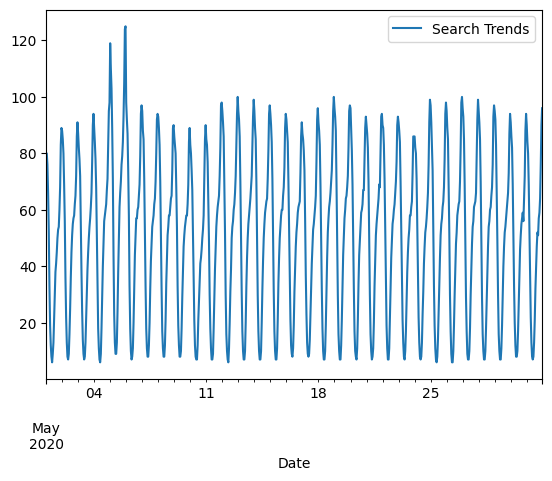

In [9]:
# Slice the DataFrame to just the month of May 2020
may_2020_df = df_mercado_trends.loc['2020-05-01':'2020-05-31']
display(may_2020_df.head())
display(may_2020_df.tail())

# Plot to visualize the data for May 2020
may_2020_df.plot()


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [10]:
# Calculate the sum of the total search traffic for May 2020
may_2020_df.sum()

# View the traffic_may_2020 value
view_of_traffic_may_2020 = may_2020_df.sum()
view_of_traffic_may_2020


Search Trends    38181
dtype: int64

In [11]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby(by=[df_mercado_trends.index.year,df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
median_monthly_traffic



Search Trends    35172.5
dtype: float64

In [12]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
view_of_traffic_may_2020/median_monthly_traffic

Search Trends    1.085536
dtype: float64

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**
The traffic had increased in May 2020 compared to the median monthly traffic by 8.5%.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

<Axes: xlabel='Date'>

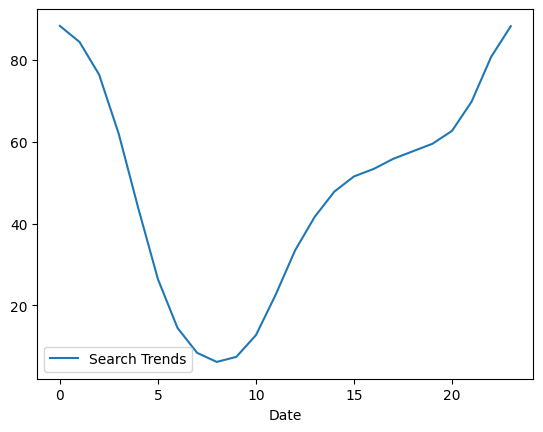

In [13]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
df_mercado_trends.groupby(df_mercado_trends.index.hour).mean().plot()


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<Axes: xlabel='day'>

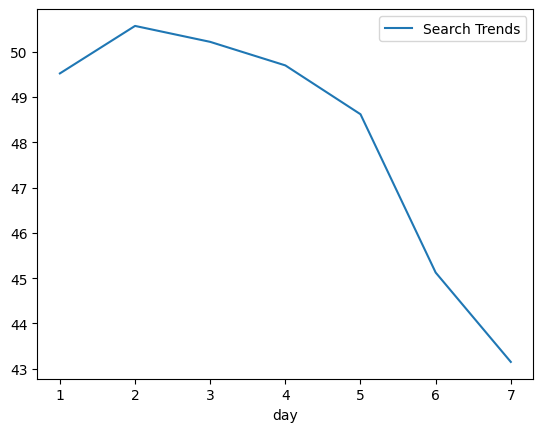

In [14]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day).mean().plot()


#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<Axes: xlabel='week'>

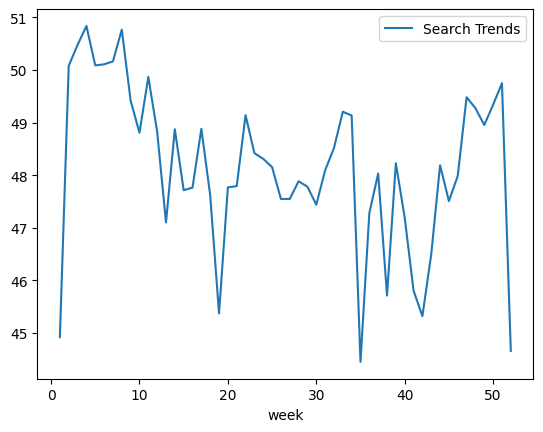

In [15]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean().plot()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**
yes there are trends. The search traffic for MercadoLibre in May 2020 shows a notable increase around the time of the company's quarterly financial results. This suggests that there is a correlation between major corporate events, like financial results announcements and search traffic spikes. The average hourly search traffic indicates that there are specific peaks during certain hours of the day. For instance, there might be higher activity during business hours compared to late night or early morning hours. The average daily search traffic by day of the week shows variations, with potential peaks on certain days. Further analysis could reveal if there are differences in search behavior between weekdays and weekends. Looking at the average search traffic by week of the year, there may be seasonal patterns. For example, there could be higher search traffic during holiday seasons or specific marketing campaigns.


## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [16]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

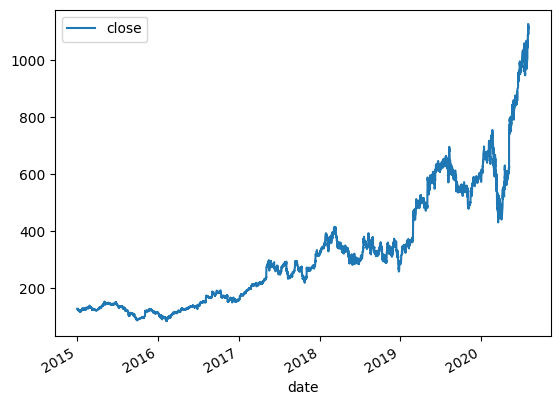

In [17]:
# Visualize the closing price of the df_mercado_stock DataFrame
closing_price_df = df_mercado_stock.loc[:,['close']]
closing_price_df.plot()


In [18]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_mercado_trends_stock = pd.concat([df_mercado_trends, closing_price_df], axis=1).dropna()

# View the first and last five rows of the DataFrame
print(df_mercado_trends_stock.head())
print(df_mercado_trends_stock.tail())

                     Search Trends   close
2016-06-01 09:00:00            6.0  135.16
2016-06-01 10:00:00           12.0  136.63
2016-06-01 11:00:00           22.0  136.56
2016-06-01 12:00:00           33.0  136.42
2016-06-01 13:00:00           40.0  136.10
                     Search Trends     close
2020-07-31 11:00:00           20.0  1105.780
2020-07-31 12:00:00           32.0  1087.925
2020-07-31 13:00:00           41.0  1095.800
2020-07-31 14:00:00           47.0  1110.650
2020-07-31 15:00:00           53.0  1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [19]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_mercado_trends_stock.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
print(first_half_2020.head())
print(first_half_2020.tail())


                     Search Trends    close
2020-01-02 09:00:00            9.0  601.085
2020-01-02 10:00:00           14.0  601.290
2020-01-02 11:00:00           25.0  615.410
2020-01-02 12:00:00           37.0  611.400
2020-01-02 13:00:00           50.0  611.830
                     Search Trends   close
2020-06-30 11:00:00           17.0  976.17
2020-06-30 12:00:00           27.0  977.50
2020-06-30 13:00:00           37.0  973.23
2020-06-30 14:00:00           45.0  976.50
2020-06-30 15:00:00           51.0  984.93


array([<Axes: >, <Axes: >], dtype=object)

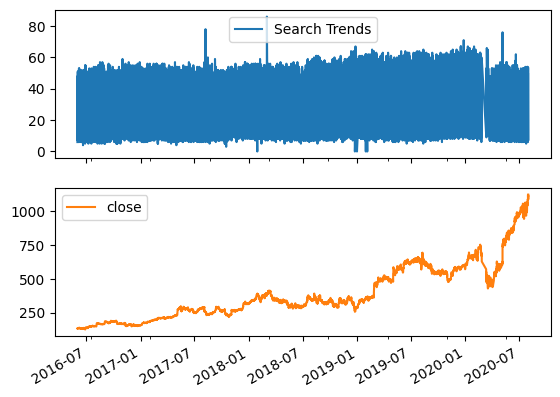

In [20]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
df_mercado_trends_stock.plot(subplots=True)

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**
It does not appear that way based on the visualization. The Trends has some flucuation but appears to be more consistant compared to the close which progressively goes up year over year. There are some dips from time to time but trending up.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [21]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
lagged_search_trends = df_mercado_trends_stock['Search Trends'].shift(1)

# View the first and
lagged_search_trends.head()


2016-06-01 09:00:00     NaN
2016-06-01 10:00:00     6.0
2016-06-01 11:00:00    12.0
2016-06-01 12:00:00    22.0
2016-06-01 13:00:00    33.0
Name: Search Trends, dtype: float64

In [22]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado_trends_stock['Stock Volatility'] = df_mercado_trends_stock['close'].rolling(window=4).std()


2016-06-01 09:00:00          NaN
2016-06-01 10:00:00          NaN
2016-06-01 11:00:00          NaN
2016-06-01 12:00:00     0.693848
2016-06-01 13:00:00     0.235142
                         ...    
2020-07-31 11:00:00     7.495900
2020-07-31 12:00:00    12.188462
2020-07-31 13:00:00     7.393646
2020-07-31 14:00:00    10.169735
2020-07-31 15:00:00    15.408790
Name: Stock Volatility, Length: 7067, dtype: float64


<Axes: >

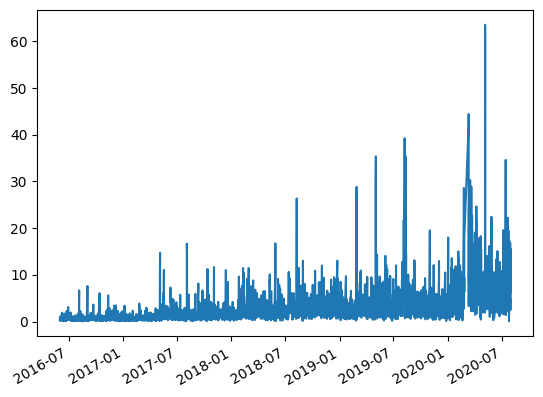

In [23]:
# Visualize the stock volatility
print(df_mercado_trends_stock['Stock Volatility'])
df_mercado_trends_stock['Stock Volatility'].plot()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [24]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_mercado_trends_stock['Hourly Stock Return'] = df_mercado_trends_stock['close'].pct_change()


In [25]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
print(df_mercado_trends_stock.head())
print(df_mercado_trends_stock.tail())

                     Search Trends   close  Stock Volatility  \
2016-06-01 09:00:00            6.0  135.16               NaN   
2016-06-01 10:00:00           12.0  136.63               NaN   
2016-06-01 11:00:00           22.0  136.56               NaN   
2016-06-01 12:00:00           33.0  136.42          0.693848   
2016-06-01 13:00:00           40.0  136.10          0.235142   

                     Hourly Stock Return  
2016-06-01 09:00:00                  NaN  
2016-06-01 10:00:00             0.010876  
2016-06-01 11:00:00            -0.000512  
2016-06-01 12:00:00            -0.001025  
2016-06-01 13:00:00            -0.002346  
                     Search Trends     close  Stock Volatility  \
2020-07-31 11:00:00           20.0  1105.780          7.495900   
2020-07-31 12:00:00           32.0  1087.925         12.188462   
2020-07-31 13:00:00           41.0  1095.800          7.393646   
2020-07-31 14:00:00           47.0  1110.650         10.169735   
2020-07-31 15:00:00        

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [26]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_trends_stock['lagged_search_trends'] = lagged_search_trends
df_mercado_trends_stock.corr()

# Review the resulting DataFrame
print(df_mercado_trends_stock.head())
print(df_mercado_trends_stock.tail())

                     Search Trends   close  Stock Volatility  \
2016-06-01 09:00:00            6.0  135.16               NaN   
2016-06-01 10:00:00           12.0  136.63               NaN   
2016-06-01 11:00:00           22.0  136.56               NaN   
2016-06-01 12:00:00           33.0  136.42          0.693848   
2016-06-01 13:00:00           40.0  136.10          0.235142   

                     Hourly Stock Return  lagged_search_trends  
2016-06-01 09:00:00                  NaN                   NaN  
2016-06-01 10:00:00             0.010876                   6.0  
2016-06-01 11:00:00            -0.000512                  12.0  
2016-06-01 12:00:00            -0.001025                  22.0  
2016-06-01 13:00:00            -0.002346                  33.0  
                     Search Trends     close  Stock Volatility  \
2020-07-31 11:00:00           20.0  1105.780          7.495900   
2020-07-31 12:00:00           32.0  1087.925         12.188462   
2020-07-31 13:00:00        

##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**
Yes, there appears to be some relationship between the lagged search traffic and both stock volatility and stock price returns. When we shift the search traffic data by one hour (creating lagged search trends), we observe fluctuations in stock volatility and hourly stock returns. This suggests that changes in search interest may coincide with changes in how volatile the stock price is over a short period, as well as with how much the stock price changes hour by hour. This relationship indicates that search trends could potentially be used as a signal for understanding short-term movements in the company's stock.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [38]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends.reset_index(drop=True, inplace=True)
# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends.rename(columns={'date': 'ds', 'search_trends': 'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_mercado_trends = df_mercado_trends.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
print(df_mercado_trends.head(5))
print(df_mercado_trends.tail(5))

   Search Trends
0             97
1             92
2             76
3             60
4             38
       Search Trends
37101             71
37102             83
37103             96
37104             97
37105             96


In [46]:
# Call the Prophet function, store as an object
model = Prophet()

In [49]:
# Fit the time-series model.
df_mercado_trends.reset_index(inplace=True)
df_mercado_trends = df_mercado_trends.rename(columns={'index': 'ds', 'Search Trends': 'y'})
df_mercado_trends = df_mercado_trends.dropna()

In [71]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)

future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail(5)

,ds
39101,1970-03-25 04:00:00.000037105
39102,1970-03-25 05:00:00.000037105
39103,1970-03-25 06:00:00.000037105
39104,1970-03-25 07:00:00.000037105
39105,1970-03-25 08:00:00.000037105


In [78]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
from prophet import Prophet
model = Prophet()
model.fit(df_mercado_trends)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
print(forecast_mercado_trends.head(5))


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp32zi6sly/rsaj25r5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp32zi6sly/rdneq_ec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10939', 'data', 'file=/tmp/tmp32zi6sly/rsaj25r5.json', 'init=/tmp/tmp32zi6sly/rdneq_ec.json', 'output', 'file=/tmp/tmp32zi6sly/prophet_modele8f0qur1/prophet_model-20240715211913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:19:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:19:16 - cmdstanpy - INFO - Chain

                       ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 1970-01-01 00:00:00.000  45.216000   11.564978   78.379359    45.216000   
1 1970-01-01 00:00:00.001  45.216115   11.019812   81.749213    45.216115   
2 1970-01-01 00:00:00.002  45.216230    9.731443   77.165471    45.216230   
3 1970-01-01 00:00:00.003  45.216345   10.641272   81.407514    45.216345   
4 1970-01-01 00:00:00.004  45.216460   11.220659   81.325649    45.216460   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    45.216000             0.0                   0.0                   0.0   
1    45.216115             0.0                   0.0                   0.0   
2    45.216230             0.0                   0.0                   0.0   
3    45.216345             0.0                   0.0                   0.0   
4    45.216460             0.0                   0.0                   0.0   

   multiplicative_terms  multiplicative_terms_lower  \
0            

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

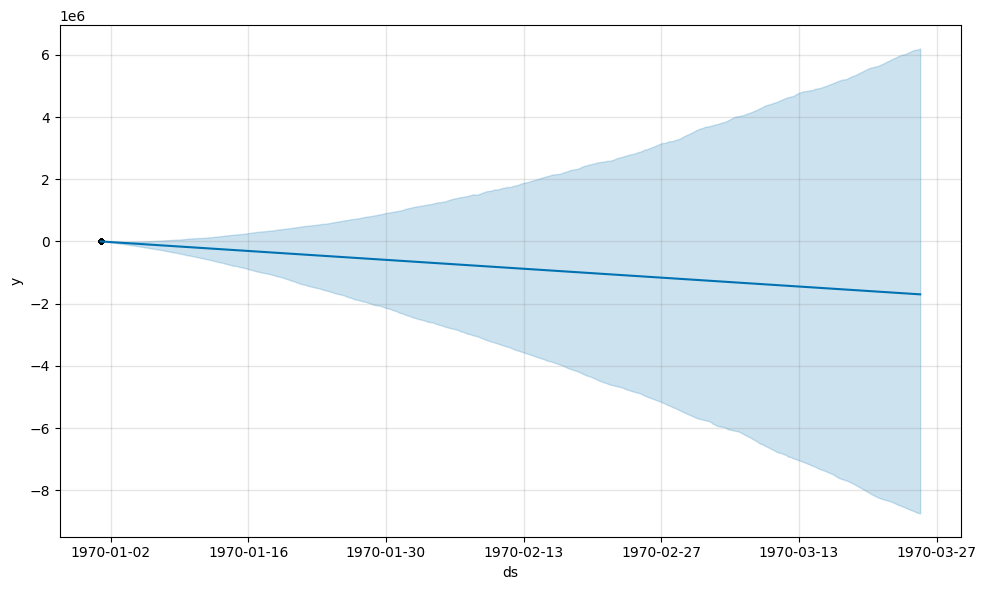

In [81]:
# Plot the Prophet predictions for the Mercado trends data
fig = model.plot(forecast_mercado_trends)



##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
The near-term forecast for the popularity of MercadoLibre shows an expected trend where the hourly search volume is projected to vary between approximately 82.5 to 98.1 searches per hour. This forecast suggests that the popularity of MercadoLibre is expected to remain stable within this range over the coming period.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [89]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.index.name = 'ds'
forecast_mercado_trends['ds'] = forecast_mercado_trends.index
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')
# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
print(forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']])

                                 yhat    yhat_lower    yhat_upper
ds                                                               
1970-01-01 00:00:00.000  4.521600e+01  1.156498e+01  7.837936e+01
1970-01-01 00:00:00.001  4.521611e+01  1.101981e+01  8.174921e+01
1970-01-01 00:00:00.002  4.521623e+01  9.731443e+00  7.716547e+01
1970-01-01 00:00:00.003  4.521634e+01  1.064127e+01  8.140751e+01
1970-01-01 00:00:00.004  4.521646e+01  1.122066e+01  8.132565e+01
...                               ...           ...           ...
1970-03-25 04:00:37.105 -1.697628e+06 -8.729422e+06  6.182157e+06
1970-03-25 05:00:37.105 -1.698479e+06 -8.733423e+06  6.187866e+06
1970-03-25 06:00:37.105 -1.699329e+06 -8.737426e+06  6.192127e+06
1970-03-25 07:00:37.105 -1.700180e+06 -8.741357e+06  6.198796e+06
1970-03-25 08:00:37.105 -1.701030e+06 -8.745287e+06  6.205578e+06

[39106 rows x 3 columns]


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

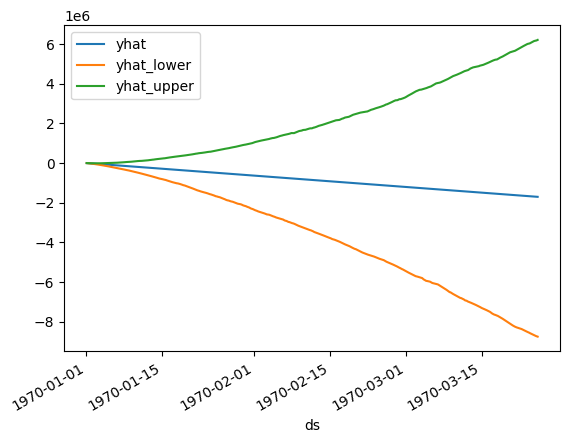

In [91]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].tail(2000).plot()

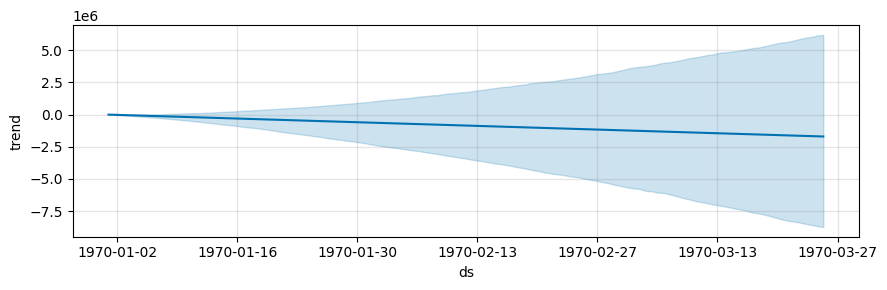

In [100]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index(drop=True)

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
fig = model.plot_components(forecast_mercado_trends)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**
Early Afternoon.

**Question:** Which day of week gets the most search traffic?
   
**Answer:**
higher traffice during the week days, preferably early to mid week.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
Late night hours would be the lowest point.
